In [1]:
#pip install xgboost

In [2]:
# Importing related libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import tensorflow as tf
import keras
import autokeras as ak
import random
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math
from xgboost import XGBClassifier
from xgboost import XGBRegressor

In [3]:
# Set seed to make sure the code to be reproducible
random.seed(123)
np.random.seed(123)
tf.random.set_seed(123)

In [4]:
# Import the dataset
filename = 'norwegian_dataset.csv'
training_data = pd.read_csv(filename, index_col = False)
training_data

,DTC,DTS,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,115.693207,267.867310,96.910202,6.0,0.391600,0.709900,2.480200,0.665700,15/9-23,2315.461914
1,115.910004,272.334198,108.976501,6.0,0.391100,0.721212,2.502200,0.669454,15/9-23,2315.614502
2,116.315399,280.204407,126.231796,6.0,0.407800,0.728698,2.473100,0.702844,15/9-23,2315.766846
3,117.308701,283.573303,149.429504,6.0,0.407700,0.727200,2.481300,0.730400,15/9-23,2315.919189
4,120.262398,290.746399,163.915497,6.0,0.426000,0.704400,2.470900,0.677300,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,102.518501,127.078522,30.631025,1.0,0.166493,0.830020,2.334237,0.788812,7/1-2 S,3159.605469
184715,102.657097,127.074806,32.643269,1.0,0.176284,0.858255,2.365948,0.819950,7/1-2 S,3159.757812
184716,102.701103,127.075409,36.831581,1.0,0.183089,0.901830,2.379198,0.866326,7/1-2 S,3159.910156
184717,101.990501,127.065430,41.760101,1.0,0.175724,0.919743,2.360352,0.888828,7/1-2 S,3160.062500


In [5]:
training_data['LITHOLOGY_GEOLINK'].unique()

array([ 6.,  7.,  5., 19., 16.,  4.,  2.,  1., 11., 12., 13., 18.,  3.,
       10.,  9., 15., 17., 22.])

In [6]:
df = training_data
df.loc[df["LITHOLOGY_GEOLINK"] == 9, "LITHOLOGY_GEOLINK"]  = 8
df.loc[df["LITHOLOGY_GEOLINK"] == 10, "LITHOLOGY_GEOLINK"] = 9
df.loc[df["LITHOLOGY_GEOLINK"] == 11, "LITHOLOGY_GEOLINK"]  = 10
df.loc[df["LITHOLOGY_GEOLINK"] == 12, "LITHOLOGY_GEOLINK"] = 11
df.loc[df["LITHOLOGY_GEOLINK"] == 13, "LITHOLOGY_GEOLINK"] = 12
df.loc[df["LITHOLOGY_GEOLINK"] == 15, "LITHOLOGY_GEOLINK"] = 13
df.loc[df["LITHOLOGY_GEOLINK"] == 16, "LITHOLOGY_GEOLINK"] = 14
df.loc[df["LITHOLOGY_GEOLINK"] == 17, "LITHOLOGY_GEOLINK"] = 15
df.loc[df["LITHOLOGY_GEOLINK"] == 18, "LITHOLOGY_GEOLINK"] = 16
df.loc[df["LITHOLOGY_GEOLINK"] == 19, "LITHOLOGY_GEOLINK"] = 17
df.loc[df["LITHOLOGY_GEOLINK"] == 22, "LITHOLOGY_GEOLINK"] = 18
training_data = df
training_data

,DTC,DTS,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,115.693207,267.867310,96.910202,6.0,0.391600,0.709900,2.480200,0.665700,15/9-23,2315.461914
1,115.910004,272.334198,108.976501,6.0,0.391100,0.721212,2.502200,0.669454,15/9-23,2315.614502
2,116.315399,280.204407,126.231796,6.0,0.407800,0.728698,2.473100,0.702844,15/9-23,2315.766846
3,117.308701,283.573303,149.429504,6.0,0.407700,0.727200,2.481300,0.730400,15/9-23,2315.919189
4,120.262398,290.746399,163.915497,6.0,0.426000,0.704400,2.470900,0.677300,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,102.518501,127.078522,30.631025,1.0,0.166493,0.830020,2.334237,0.788812,7/1-2 S,3159.605469
184715,102.657097,127.074806,32.643269,1.0,0.176284,0.858255,2.365948,0.819950,7/1-2 S,3159.757812
184716,102.701103,127.075409,36.831581,1.0,0.183089,0.901830,2.379198,0.866326,7/1-2 S,3159.910156
184717,101.990501,127.065430,41.760101,1.0,0.175724,0.919743,2.360352,0.888828,7/1-2 S,3160.062500


In [7]:
training_data['LITHOLOGY_GEOLINK'].unique()

array([ 6.,  7.,  5., 17., 14.,  4.,  2.,  1., 10., 11., 12., 16.,  3.,
        9.,  8., 13., 15., 18.])

In [8]:
training_data['LITHOLOGY_GEOLINK'] = training_data['LITHOLOGY_GEOLINK'].astype(int)

In [9]:
training_data

,DTC,DTS,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,115.693207,267.867310,96.910202,6,0.391600,0.709900,2.480200,0.665700,15/9-23,2315.461914
1,115.910004,272.334198,108.976501,6,0.391100,0.721212,2.502200,0.669454,15/9-23,2315.614502
2,116.315399,280.204407,126.231796,6,0.407800,0.728698,2.473100,0.702844,15/9-23,2315.766846
3,117.308701,283.573303,149.429504,6,0.407700,0.727200,2.481300,0.730400,15/9-23,2315.919189
4,120.262398,290.746399,163.915497,6,0.426000,0.704400,2.470900,0.677300,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,102.518501,127.078522,30.631025,1,0.166493,0.830020,2.334237,0.788812,7/1-2 S,3159.605469
184715,102.657097,127.074806,32.643269,1,0.176284,0.858255,2.365948,0.819950,7/1-2 S,3159.757812
184716,102.701103,127.075409,36.831581,1,0.183089,0.901830,2.379198,0.866326,7/1-2 S,3159.910156
184717,101.990501,127.065430,41.760101,1,0.175724,0.919743,2.360352,0.888828,7/1-2 S,3160.062500


In [10]:
# Convert the deep and medium resistivity to be in a form of Log based 10.
training_data["RDEP"] = np.log10(training_data["RDEP"])
training_data["RMED"] = np.log10(training_data["RMED"])
training_data

,DTC,DTS,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,115.693207,267.867310,96.910202,6,0.391600,-0.148803,2.480200,-0.176721,15/9-23,2315.461914
1,115.910004,272.334198,108.976501,6,0.391100,-0.141937,2.502200,-0.174280,15/9-23,2315.614502
2,116.315399,280.204407,126.231796,6,0.407800,-0.137453,2.473100,-0.153141,15/9-23,2315.766846
3,117.308701,283.573303,149.429504,6,0.407700,-0.138346,2.481300,-0.136439,15/9-23,2315.919189
4,120.262398,290.746399,163.915497,6,0.426000,-0.152181,2.470900,-0.169219,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,102.518501,127.078522,30.631025,1,0.166493,-0.080911,2.334237,-0.103026,7/1-2 S,3159.605469
184715,102.657097,127.074806,32.643269,1,0.176284,-0.066384,2.365948,-0.086213,7/1-2 S,3159.757812
184716,102.701103,127.075409,36.831581,1,0.183089,-0.044875,2.379198,-0.062319,7/1-2 S,3159.910156
184717,101.990501,127.065430,41.760101,1,0.175724,-0.036334,2.360352,-0.051182,7/1-2 S,3160.062500


In [11]:
# Convert the compressional and shear sonic logs into P- and S-waves velocities, in m/s
training_data['DTC'] = 100000/training_data['DTC']
training_data['DTS'] = 100000/training_data['DTS']
training_data.rename(columns={"DTC": "Vp", "DTS": "Vs"}, inplace = True)
training_data

,Vp,Vs,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,864.354985,373.319164,96.910202,6,0.391600,-0.148803,2.480200,-0.176721,15/9-23,2315.461914
1,862.738304,367.195897,108.976501,6,0.391100,-0.141937,2.502200,-0.174280,15/9-23,2315.614502
2,859.731392,356.882324,126.231796,6,0.407800,-0.137453,2.473100,-0.153141,15/9-23,2315.766846
3,852.451690,352.642505,149.429504,6,0.407700,-0.138346,2.481300,-0.136439,15/9-23,2315.919189
4,831.515102,343.942351,163.915497,6,0.426000,-0.152181,2.470900,-0.169219,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,975.433690,786.915040,30.631025,1,0.166493,-0.080911,2.334237,-0.103026,7/1-2 S,3159.605469
184715,974.116774,786.938048,32.643269,1,0.176284,-0.066384,2.365948,-0.086213,7/1-2 S,3159.757812
184716,973.699375,786.934316,36.831581,1,0.183089,-0.044875,2.379198,-0.062319,7/1-2 S,3159.910156
184717,980.483463,786.996119,41.760101,1,0.175724,-0.036334,2.360352,-0.051182,7/1-2 S,3160.062500


In [12]:
# Rename the Facies header from "LITHOLOGY_GEOLINK" into "Facies", for convenience.
training_data.rename(columns = {'LITHOLOGY_GEOLINK':'Facies'}, inplace = True)
training_data

,Vp,Vs,GR,Facies,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,864.354985,373.319164,96.910202,6,0.391600,-0.148803,2.480200,-0.176721,15/9-23,2315.461914
1,862.738304,367.195897,108.976501,6,0.391100,-0.141937,2.502200,-0.174280,15/9-23,2315.614502
2,859.731392,356.882324,126.231796,6,0.407800,-0.137453,2.473100,-0.153141,15/9-23,2315.766846
3,852.451690,352.642505,149.429504,6,0.407700,-0.138346,2.481300,-0.136439,15/9-23,2315.919189
4,831.515102,343.942351,163.915497,6,0.426000,-0.152181,2.470900,-0.169219,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,975.433690,786.915040,30.631025,1,0.166493,-0.080911,2.334237,-0.103026,7/1-2 S,3159.605469
184715,974.116774,786.938048,32.643269,1,0.176284,-0.066384,2.365948,-0.086213,7/1-2 S,3159.757812
184716,973.699375,786.934316,36.831581,1,0.183089,-0.044875,2.379198,-0.062319,7/1-2 S,3159.910156
184717,980.483463,786.996119,41.760101,1,0.175724,-0.036334,2.360352,-0.051182,7/1-2 S,3160.062500


In [13]:
training_data["WELL"].unique()

array(['15/9-23', '16/10-3 Tyr Central', '16/10-5 Isbjoern',
       '16/2-11 A Johan Sverdrup Appr', '16/2-16', '16/2-6',
       '16/2-7 Johan Sverdrup Appr', '16/5-3 Johan Sverdrup Appr',
       '16/7-6', '25/10-10  Balder Triassic', '25/10-9 Aegis',
       '25/11-19 S  Balder Appr', '25/11-24 Jakob South',
       '25/8-5 S  Jotun', '31/2-19 S', '31/2-21 S', '31/3-4', '32/2-1',
       '33/6-3 S', '34/10-35', '34/11-1', '34/3-1 A', '34/3-2 S',
       '34/3-3 A', '34/4-10 R', '34/5-1 A', '34/5-1 S', '34/6-1',
       '35/11-10', '35/11-11', '35/11-13', '35/11-5', '35/11-6',
       '35/3-7 S', '35/6-2 S', '35/8-6 S', '35/9-10 S', '35/9-2',
       '35/9-5', '35/9-7', '35/9-8', '35/9-9', '7/1-2 S'], dtype=object)

Remove a single well to use as a blind test later. In this case, the blind well is: 15/9-23

In [14]:
blind = training_data[training_data['WELL'] == '15/9-23']
training_data = training_data[training_data['WELL'] != '15/9-23']

In [15]:
blind['Facies'].unique()

array([ 6,  7,  5, 17, 14,  4,  2,  1, 10, 11, 12, 16,  3])

In [16]:
training_data['Facies'].unique()

array([ 9, 12,  8, 11, 10,  2,  5,  4,  3,  6,  7,  1, 14, 13, 15, 18, 17,
       16])

In [17]:
training_data['WELL'] = training_data['WELL'].astype('category')

<ipython-input-17-af87227d7e99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['WELL'] = training_data['WELL'].astype('category')


In [18]:
# Define facies colors and labels

# 1 = Sandstone, 2 = Silty sand, 3 = Cross Bedded Sst, 4 = Sandy Silt, 5 = Silt
# 6 = Shaly Silt, 7 = Silty Shale, 9 = Chalk, 10 = Porous LST, 11 = LST,
# 12 = Argillaceous Limestone, 13 = Marlstone, 15 = Dolomite, 16 = Calcareous Cement
# 17 = Conglomerate, 18 = Coal, 19 = Cinerite, 22 = Anhydrite

facies_colors = ['#FFFF00','#FDE992','#FFD700','#D2B48C','#FF9999','#FFCC00','#026440',
                 '#3d85c6','#6fa8dc','#9fc5e8','#1e90ff','#00bfff','#44ffff','#36cccc',
                 '#e3b778','#000000', '#227f7f', '#FF77FF']

facies_labels = ['SS', 'SiS', 'CSS', 'SSi', 'Si', 'ShSi', 'SiSh','Ch', 'PLS', 'LS','ALS','M','D','CC',
                 'COM','COAL','CIN','ANH']
#facies_color_map is a dictionary that maps facies labels
#to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ int(row['Facies']) -1]
    
training_data.loc[:,'FaciesLabels'] = training_data.apply(lambda row: label_facies(row, facies_labels), axis=1)
training_data.describe()

C:\Users\nandi\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\nandi\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Vp,Vs,GR,Facies,NPHI,RDEP,RHOB,RMED,Depth
count,179001.000000,179001.000000,179001.000000,179001.000000,179001.000000,179001.000000,179001.000000,179001.000000,179001.000000
mean,1108.424391,555.463115,85.024165,7.070005,2.103066,0.446440,2.444573,0.448445,2720.521198
std,350.448033,229.959969,41.682120,3.526951,7.973450,0.456329,0.151355,0.457802,814.322484
min,261.159283,97.222720,0.207500,1.000000,-0.015100,-0.915044,1.244003,-0.927363,1201.265503
25%,956.626514,436.314443,58.656017,5.000000,0.208600,0.157721,2.359100,0.159086,2059.429932
50%,1123.535984,580.747429,80.702522,6.000000,0.283300,0.400153,2.473178,0.408935,2611.423096
75%,1247.844367,676.655010,106.062500,10.000000,0.355800,0.682443,2.557600,0.694351,3243.681641
max,5519.963395,2875.440293,1163.366455,18.000000,61.007858,4.466433,3.217700,4.000000,4981.242676


In [19]:
# A function to plot the facies classes, based on the facies_color and facies_label from the previous cell.

def make_facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster=np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=8, figsize=(8, 12))
    ax[0].plot(logs.Vp, logs.Depth, '-g')
    ax[1].plot(logs.Vs, logs.Depth, '-')
    ax[2].plot(logs.GR, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.NPHI, logs.Depth, '-', color='r')
    ax[4].plot(logs.RDEP, logs.Depth, '-', color='black')
    ax[5].plot(logs.RMED, logs.Depth, '-', color='orange')
    ax[6].plot(logs.RHOB, logs.Depth, '-', color='cyan')
    im=ax[7].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=18)
    
    divider = make_axes_locatable(ax[7])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((6*' ').join(['SS', 'SiS', '  CSS', ' SSi', 'Si', 'ShSi', 'SiSh','Ch', 'PLS', '  LS','  ALS','M','   D','   CC',
                                 'COM','COAL','CIN','ANH']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("Vp")
    ax[0].set_xlim(logs.Vp.min(),logs.Vp.max())
    ax[1].set_xlabel("Vs")
    ax[1].set_xlim(logs.Vs.min(),logs.Vs.max())
    ax[2].set_xlabel("GR")
    ax[2].set_xlim(logs.GR.min(),logs.GR.max())
    ax[3].set_xlabel("NPHI")
    ax[3].set_xlim(logs.NPHI.min(),logs.NPHI.max())
    ax[4].set_xlabel("RDEP")
    ax[4].set_xlim(logs.RDEP.min(),logs.RDEP.max())
    ax[5].set_xlabel("RMED")
    ax[5].set_xlim(logs.RMED.min(),logs.RMED.max())
    ax[6].set_xlabel("RHOB")
    ax[6].set_xlim(logs.RHOB.min(),logs.RHOB.max())
    ax[7].set_xlabel('Facies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([]);
    ax[7].set_yticklabels([]); ax[7].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['WELL'], fontsize=14,y=0.94)
    
    # Do the plot code
    f.savefig('facies_log_plot.svg', format='svg', dpi=1200)

For example, plotting Wells 31/2-19 S and 31/2-19 S using the function for plotting facies classes, as seen in the previous cell. 

Also with the features (seven well logs)

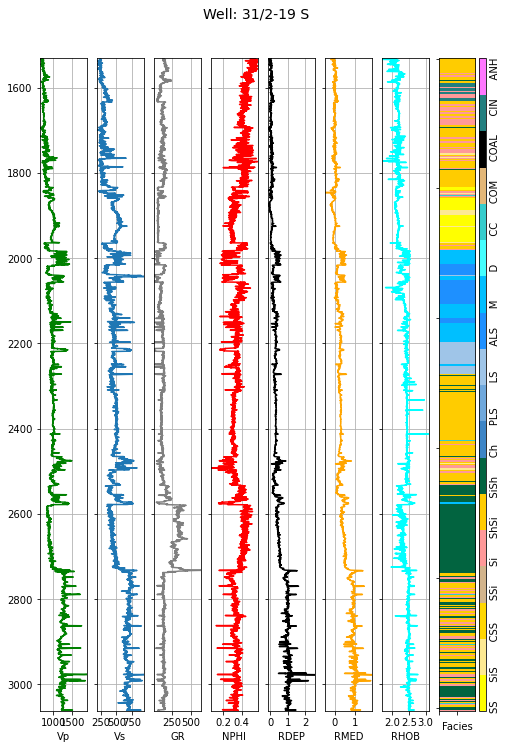

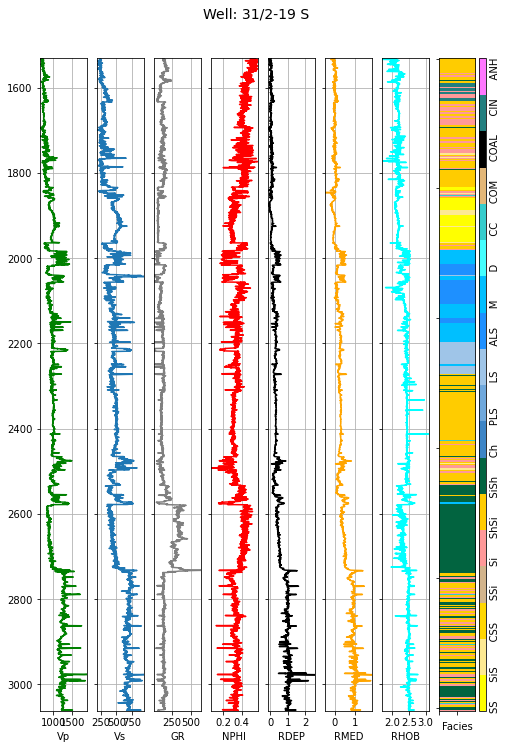

In [20]:
make_facies_log_plot(
    training_data[training_data['WELL'] == '31/2-19 S'],
    facies_colors)

make_facies_log_plot(
    training_data[training_data['WELL'] == '31/2-19 S'],
    facies_colors)

SS       8207
SiS     12400
CSS      3638
SSi      5845
Si      31303
ShSi    36468
SiSh    25708
Ch       3145
PLS      1401
LS       9148
ALS      8321
M       25292
D        2673
CC       2899
COM        44
COAL      262
CIN      1959
ANH       288
Name: Facies, dtype: int64

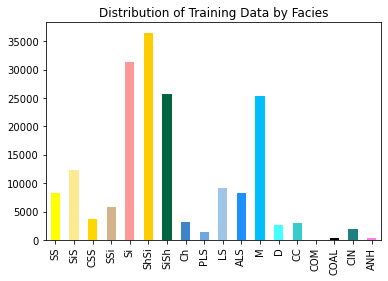

In [21]:
#count the number of unique entries for each facies, sort them by
#facies number (instead of by number of entries)
facies_counts = training_data['Facies'].value_counts().sort_index()
#use facies labels to index each count
facies_counts.index = facies_labels

facies_counts.plot(kind='bar',color=facies_colors, 
                   title='Distribution of Training Data by Facies')
facies_counts

# Conditioning the data set

In [22]:
# correct_labels = training_data[['Vp','Vs']].values
# correct_labels

In [23]:
# correct_labels[0:3]

In [24]:
# df = pd.DataFrame(correct_labels, columns = ['Vp','Vs'])
# df = pd.DataFrame(correct_labels, columns = ['Vp'])

# print(df)

In [25]:
# correct_labels = training_data['Facies'].values
# correct_labels = training_data[['Vp','Vs']].values
# correct_labels = training_data['Vp'].values
correct_labels = training_data['Vs'].values
correct_labels

feature_vectors = training_data.drop(['Vp','Vs','WELL', 'Depth','FaciesLabels','Facies'], axis=1)
feature_vectors.describe()

,GR,NPHI,RDEP,RHOB,RMED
count,179001.000000,179001.000000,179001.000000,179001.000000,179001.000000
mean,85.024165,2.103066,0.446440,2.444573,0.448445
std,41.682120,7.973450,0.456329,0.151355,0.457802
min,0.207500,-0.015100,-0.915044,1.244003,-0.927363
25%,58.656017,0.208600,0.157721,2.359100,0.159086
50%,80.702522,0.283300,0.400153,2.473178,0.408935
75%,106.062500,0.355800,0.682443,2.557600,0.694351
max,1163.366455,61.007858,4.466433,3.217700,4.000000


In [26]:
# Perform Standard scaler for the dataset

from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(feature_vectors)
scaled_features = scaler.transform(feature_vectors)

In [27]:
df_scaled_feat = pd.DataFrame(scaled_features,columns=['GR','NPHI','RDEP_log10','RHOB','RMED_log10'])
df_scaled_feat

,GR,NPHI,RDEP_log10,RHOB,RMED_log10
0,-0.330323,-0.198929,-0.860764,-1.214547,-1.079820
1,-0.457191,-0.217238,-0.857147,-0.127503,-1.088584
2,-0.444280,-0.227331,-0.854568,-0.742820,-1.089441
3,-0.413933,-0.230131,-0.848937,-0.763863,-1.086165
4,-0.442292,-0.227046,-0.886897,-0.820611,-1.111157
...,...,...,...,...,...
178996,-1.304955,-0.242878,-1.155644,-0.728989,-1.204609
178997,-1.256679,-0.241650,-1.123808,-0.519477,-1.167882
178998,-1.156196,-0.240797,-1.076674,-0.431935,-1.115689
178999,-1.037955,-0.241721,-1.057955,-0.556449,-1.091363


In [28]:
scaled_features

array([[-0.33032324, -0.1989286 , -0.86076369, -1.2145469 , -1.07982029],
       [-0.45719097, -0.21723833, -0.85714705, -0.12750257, -1.08858376],
       [-0.4442802 , -0.22733123, -0.85456812, -0.7428199 , -1.08944097],
       ...,
       [-1.15619644, -0.24079687, -1.07667366, -0.43193516, -1.11568937],
       [-1.03795547, -0.24172061, -1.0579555 , -0.55644941, -1.09136317],
       [-1.14252047, -0.24017091, -1.07520113, -0.73693798, -1.10189395]])

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
        scaled_features, correct_labels, test_size=0.2, random_state=123)

In [30]:
x_train

array([[-0.35943252, -0.24608808, -0.07032924,  0.42170382, -0.07336981],
       [-1.0744497 , -0.23816157, -0.34421424, -0.23040779, -0.34875251],
       [ 0.33620102, -0.23382234,  0.11897166,  0.75535854,  0.19819016],
       ...,
       [-1.53991439, -0.24074547,  0.17107914, -0.07124944,  0.146644  ],
       [-0.69523449, -0.19641057, -1.39891802, -1.68262724, -1.44708019],
       [-0.52004131, -0.23310746, -0.84631336, -0.78870799, -0.8672375 ]])

In [31]:
import sklearn.metrics as metrics

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

# Conventional ML - SVM Classification

In [32]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [33]:
svm_reg = SVR(gamma='scale', C=1000, kernel='rbf')
svm_reg.fit(x_train, y_train)

SVR(C=1000)

In [34]:
test_pred = svm_reg.predict(x_test)
train_pred = svm_reg.predict(x_train)

In [35]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 66.88976184313573
MSE: 26615.20171567986
RMSE: 163.1416614960135
R2 Square 0.5075609199453164
__________________________________
Train set evaluation:
_____________________________________
MAE: 66.44773503794168
MSE: 25469.03408565105
RMSE: 159.59020673478386
R2 Square 0.5157017363705124
__________________________________


# Conventional ML - RF Classification

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
rf_reg = RandomForestRegressor(n_estimators=1000, random_state=123)
rf_reg.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=123)

In [38]:
test_pred = rf_reg.predict(x_test)
train_pred = rf_reg.predict(x_train)

In [39]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 46.39005417326388
MSE: 10902.907991463391
RMSE: 104.41699091366017
R2 Square 0.7982725046162611
__________________________________
Train set evaluation:
_____________________________________
MAE: 17.169231805218878
MSE: 1455.4640170694202
RMSE: 38.15054412546982
R2 Square 0.9723240899567903
__________________________________


# Conventional ML - XGBoost Classification

In [40]:
# from sklearn.preprocessing import LabelEncoder  
# le = LabelEncoder()
# y_train_le = le.fit_transform(y_train) # Change class from [1, 2, 3, 4, ..., 9] to [0, 1, 2, 3, ..., 8]

In [41]:
y_train

array([719.11564227, 505.18127625, 600.08447843, ..., 695.3868864 ,
       279.21276792, 584.04802781])

In [42]:
# y_train_le

In [43]:
# XGB = XGBClassifier(n_estimators = 1000, learning_rate = 0.01, max_depth = 10)
XGB = XGBRegressor(n_estimators = 1000, learning_rate = 0.01, max_depth = 10)
XGB.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=10, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [44]:
test_pred = XGB.predict(x_test)
train_pred = XGB.predict(x_train)

In [45]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 53.36333076285369
MSE: 12183.499858425146
RMSE: 110.3788922685182
R2 Square 0.7745787717026892
__________________________________
Train set evaluation:
_____________________________________
MAE: 43.80348367419779
MSE: 6093.249681171035
RMSE: 78.05927030898403
R2 Square 0.8841357614690778
__________________________________


In [46]:
# y_pred_XGB_ = XGB.predict(x_test)
# y_pred_XGB = le.inverse_transform(y_pred_XGB_) # Change class back from [0, 1, 2, 3, ..., 8] to [1, 2, 3, 4, ..., 9]
# y_pred_XGB

In [47]:
# from sklearn.metrics import accuracy_score
# # The confusion matrix helps visualize the performance of the algorithm.
# cm = metrics.confusion_matrix(y_test, y_pred_XGB)

# # compute and print accuracy score
# # compute and print accuracy score
# print('Training Accuracy is: {0:0.4f}'. format(XGB.fit(x_train, y_train_le).score(x_train, y_train_le)))
# print('Testing Accuracy is: {0:0.4f}'. format(accuracy_score(y_test, y_pred_XGB)))

In [48]:
# %matplotlib inline
# import matplotlib.pyplot as plt

# from IPython.display import Image, display

# fig, ax = plt.subplots(figsize=(5, 5))
# ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
# for i in range(cm.shape[0]):
#      for j in range(cm.shape[1]):
#          ax.text(x=j, y=i,
#                 s=cm[i, j], 
#                 va='center', ha='center')
# plt.xlabel('Predicted Values')
# plt.ylabel('Actual Values')

# x1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
# squad = ['1 (SS)','2 (SiS)','3 (CSS)','4 (SSi)','5 (Si)','6 (ShSi)','7 (SiSh)','8 (Ch)','9 (PLS)','10 (LS)',
#          '11 (ALS)', '12 (M)', '13 (D)', '14 (CC)', '15 (COM)', '16 (COAL)', '17 (CIN)', '18 (ANH)']

# ax.set_xticks(x1)
# ax.set_xticklabels(squad, minor=False, rotation=90)
# ax.set_yticks(x1)
# ax.set_yticklabels(squad)

# plt.show()
# print(classification_report(y_test, y_pred_XGB))

## Applying the classification model to the blind data

We held a well back from the training, and stored it in a dataframe called `blind`:

In [49]:
# blind
blind_test = blind.drop(['Vp','Vs','WELL', 'Depth','Facies'], axis=1)
x_blind = scaler.transform(blind_test)
x_blind

array([[ 2.85159929e-01, -2.14646142e-01, -1.30442150e+00,
         2.35386893e-01, -1.36558527e+00],
       [ 5.74644562e-01, -2.14708853e-01, -1.28937578e+00,
         3.80739897e-01, -1.36025141e+00],
       [ 9.88619261e-01, -2.12614396e-01, -1.27954868e+00,
         1.88476468e-01, -1.31407717e+00],
       ...,
       [-2.23028321e-01, -2.45573871e-01, -4.16360164e-01,
         4.23025439e-01, -4.47446978e-01],
       [ 8.38069296e-04, -2.44658330e-01, -4.63294281e-01,
         7.22322766e-01, -3.89224853e-01],
       [ 1.53575490e-01, -2.43140790e-01, -6.07570807e-01,
         9.75371267e-01, -5.29302130e-01]])

## SVC Prediction

In [50]:
y_pred_SVC = svm_reg.predict(x_blind)
# blind['Prediction_SVC'] = y_pred_SVC.astype(float)

In [51]:
y_pred_SVC

array([408.98090515, 445.3038323 , 470.74631194, ..., 585.10636814,
       558.0838108 , 533.554677  ])

In [68]:
# DF = pd.DataFrame(y_pred_SVC)
# DF.to_csv("well_15_Vs_pred_SVM.csv")

In [53]:
blind['Vs']

0       373.319164
1       367.195897
2       356.882324
3       352.642505
4       343.942351
           ...    
5713    355.084999
5714    360.638619
5715    368.611133
5716    377.090986
5717    380.055881
Name: Vs, Length: 5718, dtype: float64

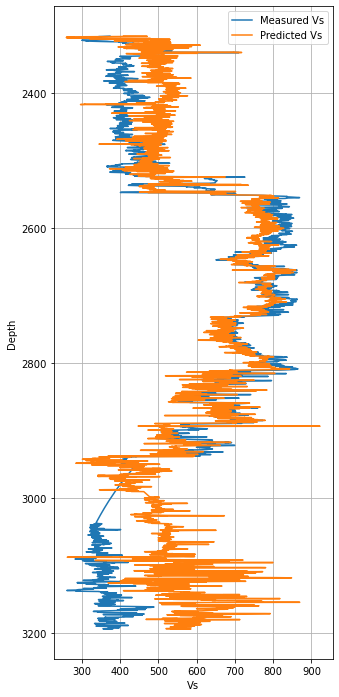

In [71]:
plt.plot(blind['Vs'],blind['Depth'],label="Measured Vs")
plt.plot(y_pred_SVC,blind['Depth'],label="Predicted Vs")
plt.legend()
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel("Vs")
plt.ylabel("Depth")
plt.legend()
fig = plt.gcf()
fig.set_size_inches(5, 12)
# fig.savefig('Vp_pred_6.png', dpi=100)

In [55]:
print_evaluate(blind['Vs'], y_pred_SVC)

MAE: 84.20302041008313
MSE: 13037.117478908049
RMSE: 114.18019740264968
R2 Square 0.6003785138641355
__________________________________


In [58]:
# Calculate Average Error
# s_vp = Vp_pred / Vp_meas
# s_vs = Vs_pred / Vs_meas
#Error_vp = (abs(1-s_vp)/(1)) * 100

import statistics
s_vs = y_pred_SVC / blind['Vs']
Error_vs = (abs(1 - s_vs)/1) * 100
Error_vs = statistics.mean(Error_vs)

# Pearson's coefficient correlation
Pearson = np.corrcoef(y_pred_SVC,blind['Vs'])

print('Average Error Vs =',Error_vs)
print('Pearson =',Pearson[1,0])

Average Error Vs = 20.428925607907942
Pearson = 0.8265526196470029


# RFC Prediction

In [59]:
y_pred_RF = rf_reg.predict(x_blind)

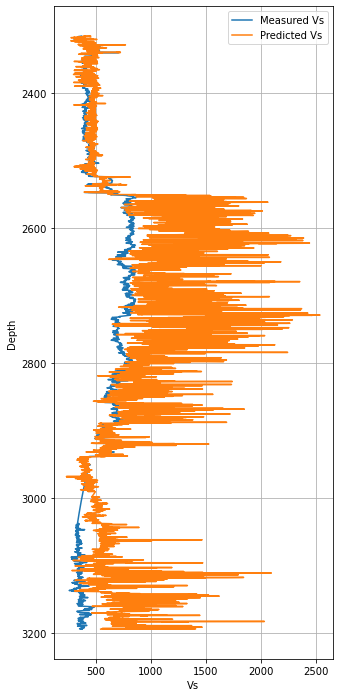

In [60]:
plt.plot(blind['Vs'],blind['Depth'],label="Measured Vs")
plt.plot(y_pred_RF,blind['Depth'],label="Predicted Vs")
plt.legend()
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel("Vs")
plt.ylabel("Depth")
plt.legend()
fig = plt.gcf()
fig.set_size_inches(5, 12)
# fig.savefig('Vp_pred_6.png', dpi=100)

In [61]:
print_evaluate(blind['Vs'], y_pred_RF)

MAE: 253.2774995095219
MSE: 152103.31955381721
RMSE: 390.00425581500673
R2 Square -3.6623615001270817
__________________________________


In [62]:
# Calculate Average Error
# s_vp = Vp_pred / Vp_meas
# s_vs = Vs_pred / Vs_meas
#Error_vp = (abs(1-s_vp)/(1)) * 100

import statistics
s_vs = y_pred_RF / blind['Vs']
Error_vs = (abs(1 - s_vs)/1) * 100
Error_vs = statistics.mean(Error_vs)

# Pearson's coefficient correlation
Pearson = np.corrcoef(y_pred_RF,blind['Vs'])

print('Average Error Vs =',Error_vs)
print('Pearson =',Pearson[1,0])

Average Error Vs = 45.22847836740684
Pearson = 0.7149163908387967


In [69]:
# DF = pd.DataFrame(y_pred_RF)
# DF.to_csv("well_15_Vs_pred_RF.csv")

# XGBoost Prediction

In [63]:
y_pred_XGB = XGB.predict(x_blind)

In [64]:
y_pred_RF

array([391.43945029, 457.23547512, 440.53226261, ..., 713.25013072,
       645.40179342, 546.33129453])

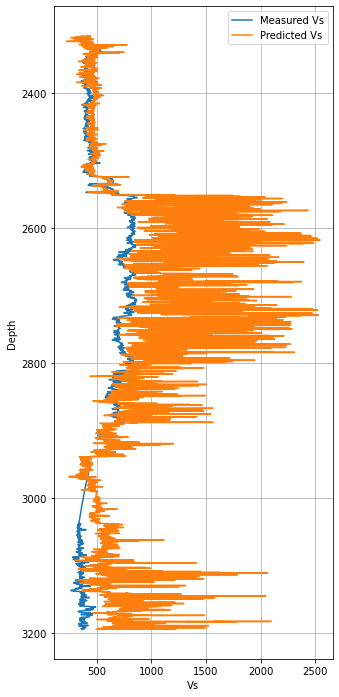

In [65]:
plt.plot(blind['Vs'],blind['Depth'],label="Measured Vs")
plt.plot(y_pred_XGB,blind['Depth'],label="Predicted Vs")
plt.legend()
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel("Vs")
plt.ylabel("Depth")
plt.legend()
fig = plt.gcf()
fig.set_size_inches(5, 12)
# fig.savefig('Vp_pred_6.png', dpi=100)

In [66]:
print_evaluate(blind['Vs'], y_pred_XGB)

MAE: 270.3939105339677
MSE: 184483.297735345
RMSE: 429.515189178852
R2 Square -4.654891867586254
__________________________________


In [67]:
# Calculate Average Error
# s_vp = Vp_pred / Vp_meas
# s_vs = Vs_pred / Vs_meas
#Error_vp = (abs(1-s_vp)/(1)) * 100

import statistics
s_vs = y_pred_XGB / blind['Vs']
Error_vs = (abs(1 - s_vs)/1) * 100
Error_vs = statistics.mean(Error_vs)

# Pearson's coefficient correlation
Pearson = np.corrcoef(y_pred_XGB,blind['Vs'])

print('Average Error Vs =',Error_vs)
print('Pearson =',Pearson[1,0])

Average Error Vs = 46.89109508306052
Pearson = 0.7225777982761467


In [70]:
DF = pd.DataFrame(y_pred_XGB)
DF.to_csv("well_15_Vs_pred_XGB.csv")